# Exam January 2023

## Ex 1
Write a Python code that extracts the information from the file and builds a dictionary, where keys are Useridentifiers
and values are lists of tuples (Date, EntryTime, ExitTime) representing an admission to the swimming pool.
Note: for simplicity, keep dates and times as strings.

In [2]:
with open('sp-admissions.tsv','w') as f:
    lines = [
    "User\tDate\tEntryTime\tExitTime",
    "101\t2023-01-01\t09:00\t10:00",
    "102\t2023-03-01\t09:30\t11:00",
    "101\t2023-03-02\t10:00\t11:15",
    "103\t2023-04-01\t08:45\t10:15",
    "102\t2023-05-03\t14:00\t15:30",]
    f.writelines('\n'.join(lines))

with open('sp-admissions.tsv', 'r') as file:
    file.readline()
    dictionary = {}
    for line in file:
        line_list=[line.strip().split('\t')]
        for line in line_list:
            if line[0] not in dictionary:
                dictionary[line[0]] = [(line[1],line[2],line[3])]
            else:
                dictionary[line[0]].append((line[1],line[2],line[3]))

dictionary


{'101': [('2023-01-01', '09:00', '10:00'), ('2023-03-02', '10:00', '11:15')],
 '102': [('2023-03-01', '09:30', '11:00'), ('2023-05-03', '14:00', '15:30')],
 '103': [('2023-04-01', '08:45', '10:15')]}

## Ex 2
Write a Python code that creates a modified version of the dictionary built in 1), so that each value is a list
with three elements: the user’s list of admissions, the number of admissions, and the number of evening admissions (whose
entry time is after 18:00). Solutions employing comprehension are preferred.

In [3]:
diction_variation={ ky:[[ ','.join(t) for t in vl],len(vl),len([True for t in vl if t[1]>'18:00'])] for ky, vl in dictionary.items()}


{'101': [['2023-01-01,09:00,10:00', '2023-03-02,10:00,11:15'], 2, 0],
 '102': [['2023-03-01,09:30,11:00', '2023-05-03,14:00,15:30'], 2, 0],
 '103': [['2023-04-01,08:45,10:15'], 1, 0]}

## Ex 3
Write a Python function that extracts the user with the greatest number of admissions. 

Note: as dict_name, you may use a dictionary that you built previously in points 1) or 2).

In [88]:
def dict_name():
    fans=[]
    mx=max([len(vl) for vl in dictionary.values()])
    for ky, vl in dictionary.items():
        if len(vl)==mx:
            fans.append(ky)
    return fans

# or
def grestes():
    fans=[]
    mx=max([len(vl) for vl in dictionary.values()])
    for ky, vl in diction_variation.items():
        if vl[1]==mx:
            fans.append(ky)

    return fans


h=dict_name()
print(h)
grestes()

['101', '102']


['101', '102']

### Some details on sorting dictionaries

## Ex 3 - different text
Write a Python function that extracts the users **who only entered once**

In [89]:
def user_once ():
    not_fan=[]
    for ky, vl in diction_variation.items():
        if vl[1]==1:
            not_fan.append(ky)
    return not_fan

user_once()

['103']

## Ex 4
Write a Python code that counts the admissions in the swimming pool in each month and plots them in a bar
plot sorted by month.

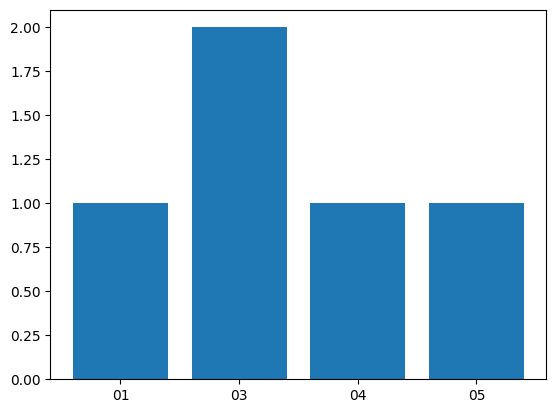

In [4]:
import matplotlib.pyplot as plt
def extract_month(date):
    #or directly
    #month=[tuple[0].split('-')[1] for ky,vl in dictionary.items() for tuple in vl]
    month=date.strip().split('-')[1]
    return month

month_count_dict={}
for ky, vl in dictionary.items():
    for tuple in vl:
        if extract_month(tuple[0]) not in month_count_dict:
            month_count_dict[extract_month(tuple[0])] = 1
        else:
            month_count_dict[extract_month(tuple[0])] += 1
out=dict(sorted(month_count_dict.items()))
plt.bar(out.keys(), out.values())
plt.show()


## Ex 5
Implement the necessary code to handle a **SwimmingPool** class, which stores the name, location, and the list of its Users. 

**Users** are represented as a class, with id, full name, and their admissions list. 

The SwimmingPool class has a method *add_user* to add a single user to the list of users. 
If a user with the same id already exists in the list of users, a DuplicateUserException is raised. 

The User class implements the methods:
- register_entry (creating an admission with date and entry time, which must be later than the ones previously recorded) and 
- register_exit (closing the last stored admission with its exit time, which must be later than entry time). 

If errors are made in input, WrongAdmissionExceptions are raised, with appropriate messages.

Users of a special kind, i.e., PSPUser (Public School Pupils), are frequent users of the pool, as they come during school
times in big groups. In addition to normal users, they also have a pupil_id and the school information. They have a method
deactivate_pupil that assigns None to the pupil_id when he/she is no longer enrolled in the school.

Implement the method that allows us to represent the entire information of the swimming pool, showing the admissions
for each admitted User. Admissions of deactivated pupils are not printed (see a correct example of use below).

In [91]:
class DuplicateUser(Exception):
    pass

class WrongAdmission(Exception):
    def __init__(self, msg):
        self.msg = msg
    def __str__(self):
        return self.msg

class User:
    def __init__(self,id,fullname):
        self.id=id
        self.fullname=fullname
        self.admissions_list=[]

    def __iter__(self):
        return iter(self.admissions_list)

    def __eq__(self, other):
        if isinstance(other,User):
            return self.id==other.id

    def __hash__(self):
        return hash(self.id)

    def register_entry(self,date:str,entrytime:str):
        date=date.strip()
        entrytime=entrytime.strip()
        if len(self.admissions_list):
            last_one= ''.join(self.admissions_list[-1][:2])
            ref=date+entrytime
            if ref>last_one:
               self.admissions_list.append([date,entrytime])
            else:
               raise WrongAdmission('the date and time of registeration  must be greater than the last')
        else:
             self.admissions_list.append([date,entrytime])


    def register_exit (self,exittime:str):
        exittime=exittime.strip()
        last_record=self.admissions_list[-1]
        if self.admissions_list[-1][1] < exittime:
            self.admissions_list[-1].append(exittime)
        else:
            raise WrongAdmission('exit time must be later than the entrytime')


class PSPUser (User):
     def __init__(self,id,fullname,pupil_id,schoolinfo):
         super().__init__(id,fullname)
         self.pupil_id=pupil_id
         self.schoolinfo=schoolinfo

     def deactivate_pupil(self):
         self.pupil_id= None


class SwimmingPool:
    def __init__(self,name,loc):
        self.name=name
        self.location=loc
        self.users_list=[]

    def add_user(self,user):
        if user in self.users_list:
            raise DuplicateUser ('User already exists')
        self.users_list.append(user)

    def __str__(self):
       output = f'Swimming pool: {self.name}\nLocation: {self.location}\n'
       for user in self.users_list:
          if isinstance(user, PSPUser) and user.pupil_id is None:
            continue
          output +=f'User{user.id}\n{'\n'.join(['  '.join(ad) for ad in user.admissions_list])}\n'
       return output


### Example of call


In [92]:
sp=SwimmingPool('Bacone', 'Via Piccinni, 8, Milano')
u1=User(1,'Paolo')
u1.register_entry('2022-01-20','11:23')
u1.register_exit('13:30')
u1.register_entry('2022-01-21', '12:30')
u1.register_exit('13:30')
sp.add_user(u1)
u3=PSPUser (3, 'Laura', 'p1', 'Copernico')
u3.register_entry('2022-01-22', '11:22')
u3.register_exit('13:30')
sp.add_user(u3)
u3.deactivate_pupil()
u4=PSPUser(4, 'Chiara', 'p2', 'Galvani')
u4.register_entry('2022-04-20', '15:34')
u4.register_exit('17:30')
sp.add_user(u4)

print(sp)

Swimming pool: Bacone
Location: Via Piccinni, 8, Milano
User1
2022-01-20  11:23  13:30
2022-01-21  12:30  13:30
User4
2022-04-20  15:34  17:30

